<a href="https://colab.research.google.com/github/5N3HA515/Cp_curve/blob/main/Thin_Airfoil_Theory_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import re

x = np.linspace(0,1,1001) #Chord-wise points distribution

# Airfoil Camber and Thickness distribution

---



The functions defined here provide camber and thickness at a perticular chordwise location. The class takes the 4-digit input which corresponds to the NACA 4-digit airfoil. Here every length scale is normalized with respect to the chord length.

Camber distribution for NACA 4-digit airfoils is in general defined as;

\begin{align}
\text{$z_c$}(x) = \left\{
\begin{array}{ll}
\frac{m}{p^2}(2p-x^2) & x \le p \\
\frac{m}{(1-p)^2}(1-2p+2px-x^2) & x > p.
\end{array}
\right.
\end{align}

Here $m$ is the normalized maximum camber (determined by $1/100^{th}$ of the first digit of the series) and $p$ is location of maximum camber (determined  by $1/10^{th}$ of the second digit of the series)

Thickness distribution for NACA 4-digit airfoils with sharp trailing edge is in general defined as;

\begin{align}
\text{$z_t$}(x) = 5t (0.2969\sqrt{x}-0.1260x-0.3516x^2+0.2843x^3-0.1036x^4)
\end{align}

Here $t$ is the normalized maximum thickness of the airfoil, defined as $1/100^{th}$ of last 2 ditits of the series.

In [ ]:
def camber_NACA(X,m,p):
  z_c = np.zeros_like(X)
  for i,x in enumerate(X):
    if x < p:
      z_c[i] = m*((2*p*x)-x*x)/np.power(p,2)
    elif x>=p:
      z_c[i]= m*(1-(2*p)+(2*p*x)-np.power(x,2))/np.power((1-p),2)
  return z_c
 
def thickness_NACA(X,t):
  z_t = np.zeros_like(X)
  for i,x in enumerate(X):  
    z_t[i] = 5*t*((0.2969*np.power(x,0.5))-(0.1260*np.power(x,1))-(0.3516*np.power(x,2))+(0.2843*np.power(x,3))-(0.1036*np.power(x,4)))    
  return z_t


class z_NACA(object):
 
  def __init__(self,d='1410'):
    self.digit = int(d)
    self.camber =  self.digit // 100
    self.m = (self.camber//10)/100
    self.p = (self.camber%10)/10
    self.t =  (self.digit % 100)/100
 
    self.name = 'NACA'+d
 
 
  def fun_zc(self,x):
    return camber_NACA(x,self.m,self.p)
   
  def fun_zt(self,x):
    return thickness_NACA(x,self.t)
 
#endclass z_NACA

#Airfoil Camber and Thickness distribution plotter

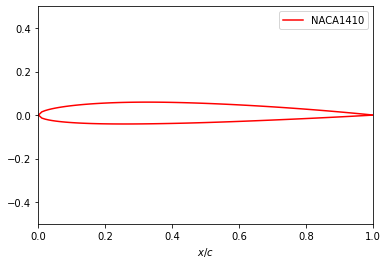

In [ ]:
def z_plot(class_zc,plot='c',d='1410',num=100,r=1):
  x = np.linspace(0,1,num)
  obj_zc = class_zc(d=d)
  zc = obj_zc.fun_zc(x)
  zt = obj_zc.fun_zt(x)

  if r ==1:
      plt.figure()
      if plot == 'c':
        plt.plot(x,zc,'g')
        plt.ylabel('$z_c$')
        
      elif plot == 't':
        plt.plot(x,zt,'r')
        plt.ylabel('$z_t$')

      elif plot == 'airfoil':
        plt.plot(x,zt+zc,'r')
        plt.plot(x,zc-zt,'r')
        plt.axis([0,1,-0.5,0.5])
      plt.legend([obj_zc.name])
      plt.xlabel('$x/c$')
      

z_plot(z_NACA,plot='c',d='1410',num=100,r=0)
z_plot(z_NACA,plot='airfoil',d='1410',num=100,r=1)

# Camber and Thickness slope distribution

---



The function `slope()` takes two arrays as input which define a particular curve. Slope at a point is calculated from neigbouring point co-ordinates, using Finite Difference Method. 

Progressiong from left to right, slope at left most point is calculated by forward difference;
\begin{align}
\left( \frac{dz}{dx}\right)_{i} = \frac{z_{i+1}-z_{i}}{x_{i+1}-x_{i}}
\end{align}

slope at right most point is calculated by backward difference;
\begin{align}
\left( \frac{dz}{dx}\right)_{i} = \frac{z_{i}-z_{i-1}}{x_{i}-x_{i-1}}
\end{align}

slope at intermediate points are calculated by central difference;
\begin{align}
\left( \frac{dz}{dx}\right)_{i} = \frac{z_{i+1}-z_{i-1}}{x_{i+1}-x_{i-1}}
\end{align}

# Airfoil Camber and Thickness slope plotter

In [ ]:
def slope(X,Z):
  dzc_dx = np.zeros_like(X)
  for i,z in enumerate(Z):
    if X[i] == 0:
      dzc_dx[i] = (Z[i+1]-z)/(X[i+1]-X[i])
    elif X[i] == 1:
      dzc_dx[i]= (z-Z[i-1])/(X[i]-X[i-1])
    else:
      dzc_dx[i]= (Z[i+1]-Z[i-1])/(X[i+1]-X[i-1])
  return dzc_dx
 
class dzdx(object):
 
  def __init__(self,d='1410'):
    self.obj_Z = z_NACA(d=d)
 
    self.name = 'NACA'+d
 
 
  def fun_dzc(self,x):
    #self.Zc=self.obj_Z.fun_zc(x)
    return slope(x,self.obj_Z.fun_zc(x))
  def fun_dzt(self,x):
    #self.Zt=self.obj_Z.fun_zt(x)
    return slope(x,self.obj_Z.fun_zt(x))

#endclass dzdx

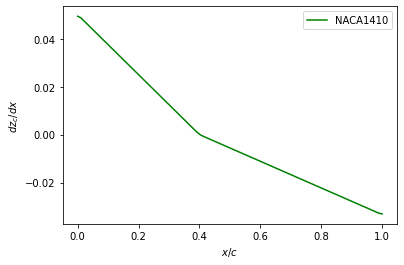

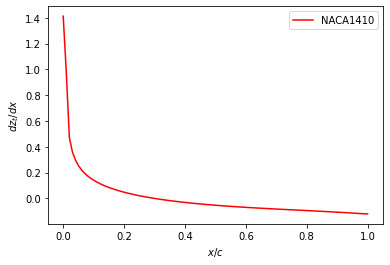

In [ ]:
def dzdx_plot(class_dzc,plot='c',d='1410',num=100,r=1):
  x = np.linspace(0,1,num)
  obj_dz = class_dzc(d=d)
  dzc = obj_dz.fun_dzc(x)
  dzt = obj_dz.fun_dzt(x)

  if r == 1:
    plt.figure()
    if plot == 'c':
      plt.plot(x,dzc,'g')
      plt.ylabel('$dz_c/dx$')
    elif plot == 't':
      plt.plot(x,dzt,'r')
      plt.ylabel('$dz_t/dx$') 
    plt.legend([obj_dz.name])
    plt.xlabel('$x/c$')

#enddef dzdx_plot
 
dzdx_plot(dzdx,plot='c',d='1410',num=100,r=1)
dzdx_plot(dzdx,plot='t',d='1410',num=100,r=1)

In [58]:
!git clone https://github.com/5N3HA515/Cp_curve.git

fatal: destination path 'Cp_curve' already exists and is not an empty directory.


# Determination of Aerodynamic Coefficients

---

Thin airfoil theory 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide


Lift Coefficient (using formula) =  0.22777383543583032
Lift Coefficient (using numerical integration) =  0.22886602074655713
Quarter-cord Pitching Moment Coefficient (using formula) =  -0.05311588853194388
Quarter-cord Pitching Moment Coefficient (using numerical integration) =  -0.0528402440069804


FileNotFoundError: ignored

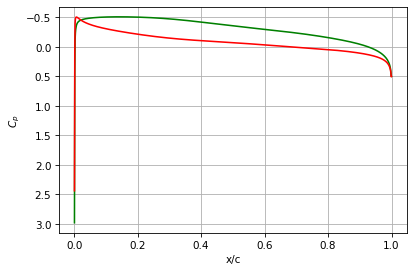

In [59]:
#Function to integrate uning trapizoidal method
def integrate(Y,X):
  A = 0
  #plt.plot(X,Y)
  for i in range(len(X)-1):
    h = X[i+1]-X[i]
    A += h*(Y[i+1]+Y[i])/2
  return A
#enddef integrate

#Function to determine fourier cosine coefficients
def Fourier(theta,dZ,N):
  A = np.zeros(N)
  for n in range(N):
    Y = np.zeros_like(theta)
    if n == 0:
      Y = -dZ/np.pi
    else:
      Y = 2*dZ*np.cos(n*theta)/np.pi
    A[n] = integrate(Y,theta)
  
  return A
#enddef Fourier

class coeffs(object):
 
  def __init__(self,d='1410'):
    self.obj_dZdX = dzdx(d = d)
 
    self.name = 'NACA'+d
 
 
  def Cp_Cl_Cm(self,alpha,r=1):
    alpha = alpha*np.pi/180 #Angle of attack 
    self.N = 10 #Number of Fourier Coefficient required
    self.dZc=self.obj_dZdX.fun_dzc(x) #Camber slope distribution
    self.dZt=self.obj_dZdX.fun_dzt(x) #Thickness slope distribution
    self.theta = np.arccos(1-(2*x)) #Co-ordinate transformation from x to theta
    self.Coeffs = Fourier(self.theta,self.dZc,self.N) # Fourier Coefficients for camber
    self.gamma = np.zeros_like(x)
    for i in range(1,self.N):
      self.gamma += 2*self.Coeffs[i]*np.sin(i*self.theta)
    self.gamma += 2*(self.Coeffs[0]+alpha)*(1+np.cos(self.theta))/np.sin(self.theta) #Circulation distribution

    self.zeta = x #Pseudo variable zeta taken for thickness problem
    self.Cp_thick = np.zeros_like(x)
    for i in range(len(x)): #Improper intergral done by Cauchy Principle Value
      self.Cp_thick[i] = -(2/np.pi)*(integrate(self.dZt[0:i]/(x[i]-self.zeta[0:i]),self.zeta[0:i])+integrate(self.dZt[i+1:len(x)+1]/(x[i]-self.zeta[i+1:len(x)+1]),self.zeta[i+1:len(x)+1]))
    self.Cp_u = self.Cp_thick - self.gamma #Cp for upper surface
    self.Cp_l = self.Cp_thick + self.gamma #Cp for lower surface
    self.Cl_i = integrate(self.Cp_l[1:len(x)]-self.Cp_u[1:len(x)],x[1:len(x)]) #Lift coefficient calculation by integrating Cp
    self.Cl_f = np.pi*((2*alpha)+(2*self.Coeffs[0])+self.Coeffs[1]) #Lift coefficient from analytical expression
    self.Cm_i = integrate(-x[1:len(x)]*(self.Cp_l[1:len(x)]-self.Cp_u[1:len(x)])+0.25*(self.Cp_l[1:len(x)]-self.Cp_u[1:len(x)]),x[1:len(x)]) #Moment coefficient calculation by integrating Cl moment
    self.Cm_f = -np.pi*(self.Coeffs[1]-self.Coeffs[2])/4 #Moment coefficient from analytical expression
    if r == 1:
      plt.figure(dpi=75)
      plt.ylabel('$C_p$')
      plt.xlabel('x/c')
      plt.plot(x,self.Cp_u,'g')
      plt.plot(x,self.Cp_l,'r')
      plt.gca().invert_yaxis()
      plt.grid()
      print('Lift Coefficient (using formula) = ',self.Cl_f)
      print('Lift Coefficient (using numerical integration) = ',self.Cl_i)
      print('Quarter-cord Pitching Moment Coefficient (using formula) = ',self.Cm_f)
      print('Quarter-cord Pitching Moment Coefficient (using numerical integration) = ',self.Cm_i)

      #print('Upload the Xfoil Cp distribution file')
      #from google.colab import files
      #uploaded = files.upload()

      with open("/content/Cp_NACA2412_a0.txt",'r') as file1:
        self.Cp = file1.readlines()
        self.x_ref = np.zeros(len(self.Cp))
        self.Cp_ref = np.zeros(len(self.Cp))
        for i,C in enumerate(self.Cp):
          numbers=[]
          for word in C.split():
            if word.replace('.', '', 1).replace('-', '', 1).isdigit(): 
              numbers.append(float(word))
          self.x_ref[i]=numbers[0]
          self.Cp_ref[i]=numbers[2]
        plt.plot(self.x_ref,self.Cp_ref,'k')
        plt.legend(['$C_{pu}$','$C_{pl}$','Xfoil data'])
        plt.title(self.name)
        plt.axis([0,1,1,-1])
      
      k=0
      if k ==1:
        with open("/content/Cp_NACA2411_a8.txt",'w') as file2:
          for i in range(len(x)):
            file2.write(str(x[i])+' '+str(self.Cp_u[i])+' '+str(self.Cp_l[i])+'\n')

    return self.Cl_i, self.Cm_i
  #enddef Cp_Cl_Cm

#endclass coeffs



(coeffs(d = '2412')).Cp_Cl_Cm(alpha = 0, r=1)

# $C_l$ and $C_{m(c/4)}$ plots

In [ ]:
class C_plot(object):
 
  def __init__(self,d='1410'):
    self.obj_C = coeffs(d = d)
 
    self.name = 'NACA'+d

  def Cl_Cm_curve(self,alpha = [0,1,2,3]):
    self.x = np.linspace(0,1,1001) 
    self.N = 3
    self.Cl = np.zeros_like(alpha)
    self.Cm = np.zeros_like(alpha)
    for ia,a in enumerate(alpha):
      self.Cl[ia] = self.obj_C.Cp_Cl_Cm(a, r=0)[0]
      self.Cm[ia] = self.obj_C.Cp_Cl_Cm(a, r=0)[1]
    
    plt.figure()
    plt.xlabel(r'$\alpha $ (deg)')
    plt.ylabel('$C_l$')
    plt.plot(alpha,self.Cl,'go-')
    plt.grid()
    plt.legend([self.name])

    plt.figure()
    plt.xlabel(r'$\alpha $ (deg)')
    plt.ylabel('$C_{m(c/4)}$')
    plt.plot(alpha,self.Cm,'ro-')
    plt.grid()
    plt.legend([self.name])


#endclass coeffs
(C_plot(d = '1410')).Cl_Cm_curve(alpha = np.linspace(-10,10,20))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide


KeyboardInterrupt: ignored